In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tsplib95
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
base_path = 'best_models/tsp_2d/'

In [3]:
trainfolder_list = ['nrange_15_20_len_1011505', 'nrange_15_20_len_1013181', 'nrange_15_20_len_1016877', 'nrange_15_20_len_1048982']

In [4]:
df_list = []
for folder in trainfolder_list:
    fnames = os.listdir(base_path+folder)
    for fname in fnames:
        if '.csv' in fname:
            df_list.append(pd.read_csv(f'{base_path}{folder}/{fname}', names=['opt_approx']))

In [5]:
for df in df_list:
    df['iteration'] = np.array(df.index)*300

In [6]:
min_points = []
for df in df_list:
    min_point = df.loc[df['opt_approx'] == df['opt_approx'].min(), :].to_numpy()
    min_points.append(min_point)

In [7]:
min_points[0][0][0]

1.0115046880721763

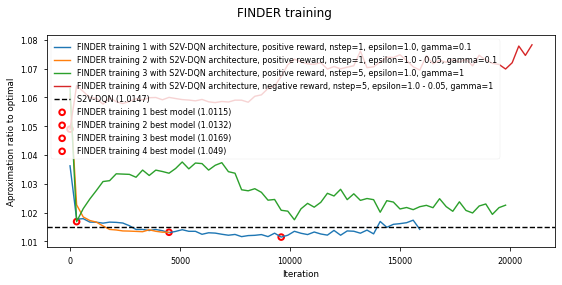

In [8]:
mpl.style.use('seaborn-paper')
#mpl.style.use('seaborn')
#minimum = df[df['opt_approx'] == df['opt_approx'].min()]
minimum_test = 1.018
fig, axs = plt.subplots(1, 1, figsize=(8,4), sharex=True, sharey=True)
#df.plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label='FINDER training')
df_list[0].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label='FINDER training 1 with S2V-DQN architecture, positive reward, nstep=1, epsilon=1.0, gamma=0.1')
df_list[1].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label='FINDER training 2 with S2V-DQN architecture, positive reward, nstep=1, epsilon=1.0 - 0.05, gamma=0.1')
df_list[2].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label='FINDER training 3 with S2V-DQN architecture, positive reward, nstep=5, epsilon=1.0, gamma=1')
df_list[3].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label='FINDER training 4 with S2V-DQN architecture, negative reward, nstep=5, epsilon=1.0 - 0.05, gamma=1')

for k, min_point in enumerate(min_points):
    axs.scatter(x=min_point[0][1], y=min_point[0][0], facecolors='none', linewidths=2, edgecolors='red',
                label=f'FINDER training {k+1} best model ({np.round(min_point[0][0],4)})')

axs.axhline(y = 1.015, color = 'black', linestyle = '--', label='S2V-DQN (1.0147)')
axs.legend(loc='upper left')
axs.set_ylabel('Aproximation ratio to optimal')
axs.set_xlabel('Iteration')
plt.suptitle('FINDER training')
plt.tight_layout()

plt.savefig('plots/training.png', dpi=400)

In [14]:
%load_ext tensorboard

%tensorboard --logdir='./graphs'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
